#### This project aims to develop a machine learning model that can predict fraudulent transactions for a financial company. The dataset used for this project is in CSV format, containing 6.3 million rows and 10 columns. The project requires both statistical analysis and Machine Learning to develop a model that can accurately predict fraudulent transactions.

#### Fraud detection is valuable to many industries including the banking-financial sectors, insurance, law enforcement, government agencies, and many more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_df = pd.read_csv('Fraud.csv')

fraud_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
#finding null values in the dataframe
fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Data does not have any NULL value

In [5]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: >

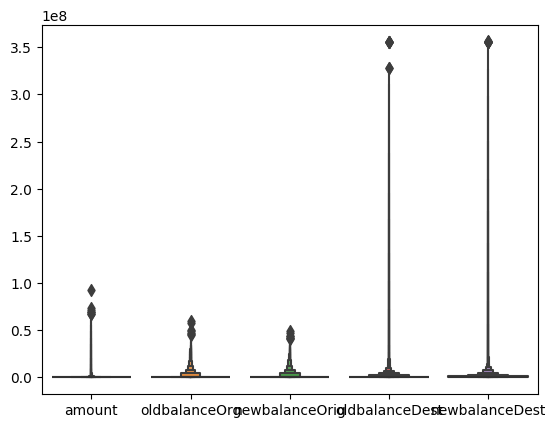

In [6]:
#finding outliers
fraud_df2 = fraud_df
fraud_df2 = fraud_df2.drop(['step','isFraud','isFlaggedFraud'],axis=1)
sns.boxenplot(data=fraud_df2)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


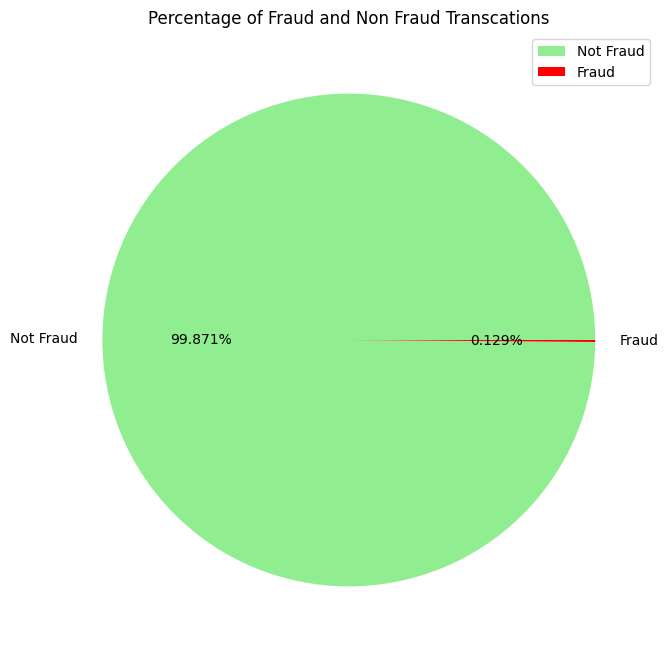

In [7]:
print(fraud_df.isFraud.value_counts())
colors = sns.color_palette('flare')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(fraud_df.isFraud.value_counts(), labels=['Not Fraud','Fraud'],colors=['lightgreen','red'], autopct='%.3f%%')
plt.legend(loc="upper right")
plt.title('Percentage of Fraud and Non Fraud Transcations')
plt.show()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


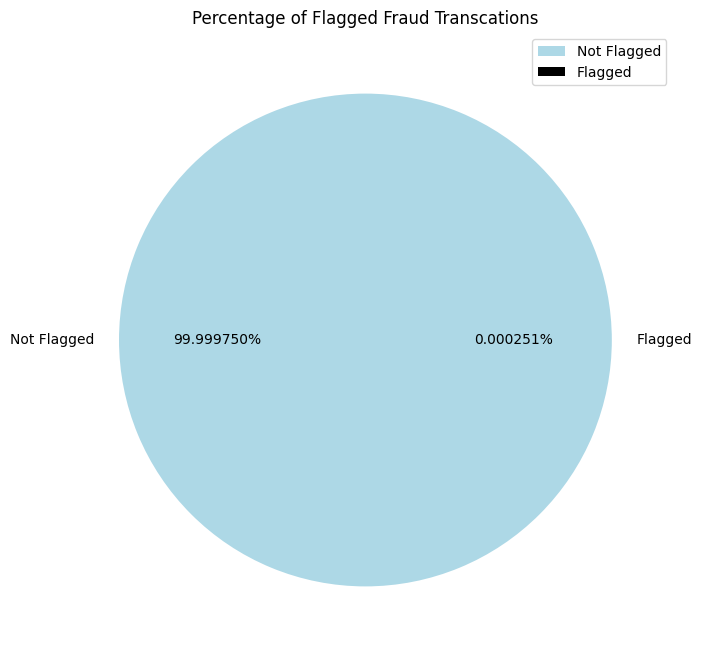

In [8]:
print(fraud_df.isFlaggedFraud.value_counts())
colors = sns.color_palette('flare')
explode = [0.1, 0.21]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(fraud_df.isFlaggedFraud.value_counts(), labels=['Not Flagged','Flagged'],colors=['lightblue','black'],autopct='%.6f%%')
plt.legend(loc="upper right")
plt.title('Percentage of Flagged Fraud Transcations')
plt.show()

Out of a total of 6,362,620 transactions, only 16 transactions are marked as fraudulent, which is a very small percentage of the overall dataset. This indicates the current methodology used in flagging fraudulent transaction is very poor.

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


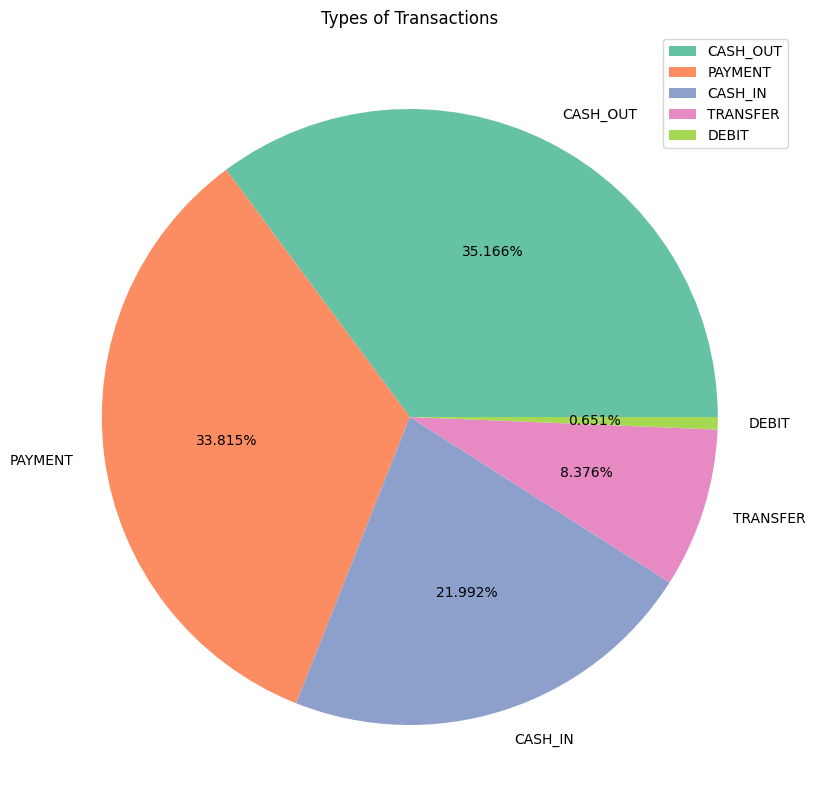

In [9]:
#to find unique values in 'type' column
print(fraud_df.type.value_counts())

colors = sns.color_palette('flare')
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(fraud_df.type.value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'],colors=sns.color_palette("Set2"), autopct='%.3f%%')
plt.legend(loc="upper right")
plt.title('Types of Transactions')
plt.show()

Based on the given transaction types and their counts, it appears that the majority of transactions are of types CASH_OUT and PAYMENT. The least common type of transaction is DEBIT. 

isFraud           0       1
type                       
CASH_IN   1399284.0     NaN
CASH_OUT  2233384.0  4116.0
DEBIT       41432.0     NaN
PAYMENT   2151495.0     NaN
TRANSFER   528812.0  4097.0
isFlaggedFraud          0     1
type                           
CASH_IN         1399284.0   NaN
CASH_OUT        2237500.0   NaN
DEBIT             41432.0   NaN
PAYMENT         2151495.0   NaN
TRANSFER         532893.0  16.0


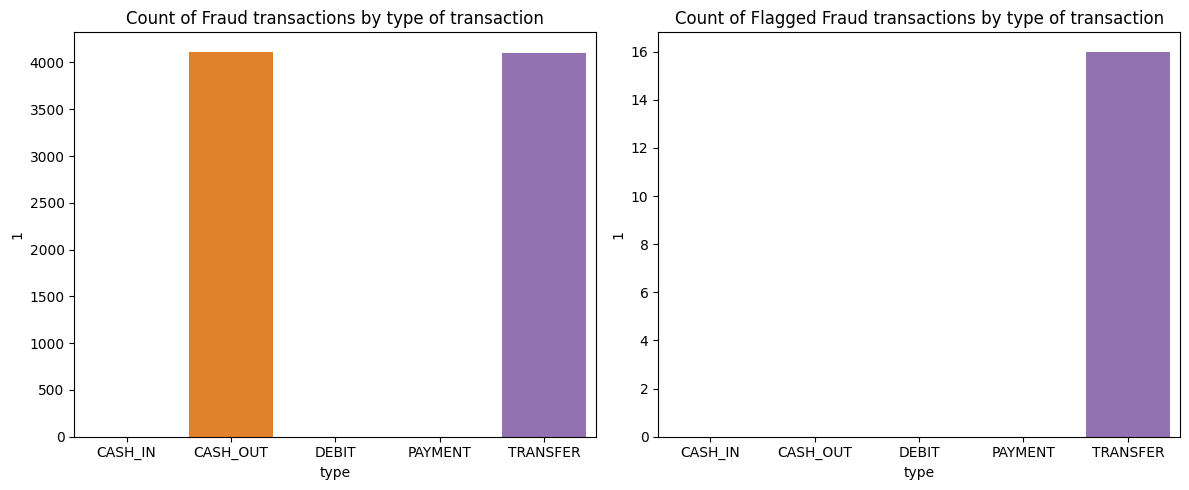

In [10]:
# Group the dataframe by transaction type and isFraud column, count the number of occurrences
fraud_by_type = fraud_df.groupby(['type', 'isFraud'])['isFraud'].count().unstack()

# Group the dataframe by transaction type and isFlaggedFraud column, count the number of occurrences
flagged_by_type = fraud_df.groupby(['type', 'isFlaggedFraud'])['isFlaggedFraud'].count().unstack()

print(fraud_by_type)
print(flagged_by_type)

# Plot the charts
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=fraud_by_type.index, y=fraud_by_type[1], ax=axs[0])
sns.barplot(x=flagged_by_type.index, y=flagged_by_type[1], ax=axs[1])

axs[0].set_title('Count of Fraud transactions by type of transaction')
axs[1].set_title('Count of Flagged Fraud transactions by type of transaction')

plt.tight_layout()
plt.show()


According to the above charts, all the fraudulent transactions were carried out under the transaction types of CASH_OUT and TRANSFER. Additionally, out of the total 16 transactions flagged as fraud, all of them belonged to the TRANSFER transaction type. This suggests that these two transaction types may be more vulnerable to fraudulent activities and require more attention and security measures to prevent such activities. 

"TRANSFER" and "CASH_OUT" transactions involve the movement of funds from one account to another. These types of transactions are more susceptible to fraudulent activities as they involve the transfer of money between different entities or accounts. Fraudsters often target these transaction types to illegally transfer funds or perform unauthorized cash withdrawals.

It is important for financial institutions and businesses to closely monitor and regulate these types of transactions to prevent potential fraudulent activities.

Also we can see that out of total 8213 fraudulent transactions only 16 were flagged as fraudulent. This shows the need for a system which can be fast and reliable to mark the transaction which is fraud.

In [11]:
step = fraud_df['step'].value_counts()

step

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

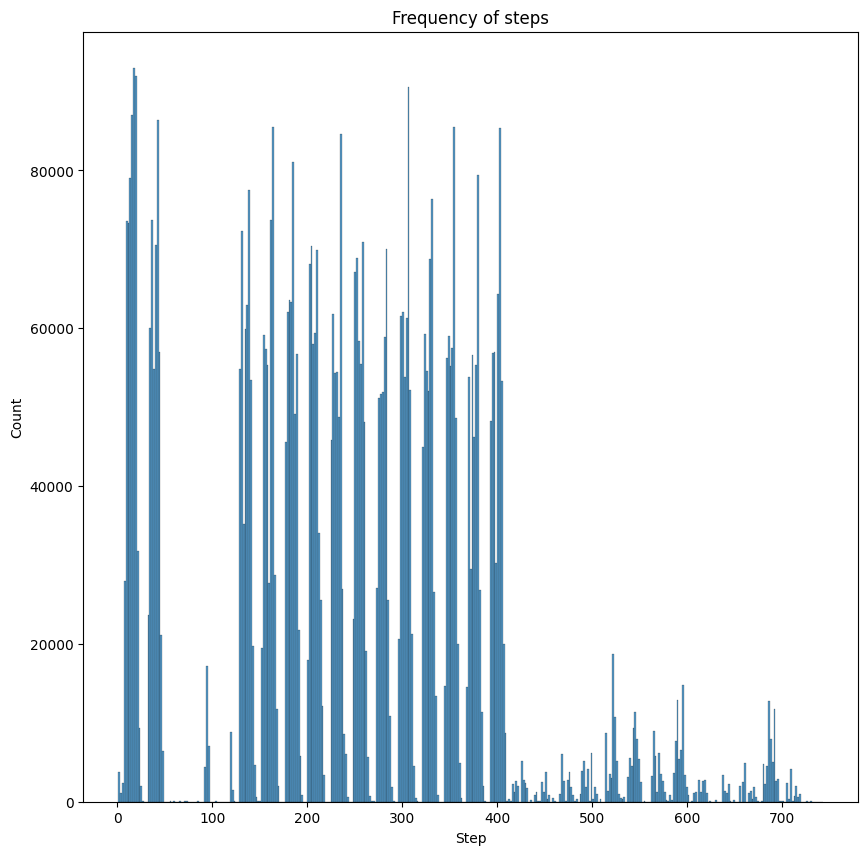

In [12]:
sns.histplot(fraud_df.step)
plt.title('Frequency of steps')
plt.xlabel('Step')
plt.show()

In [13]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", fraud_df.loc[(fraud_df.isFraud == 1) & (fraud_df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", fraud_df.loc[(fraud_df.isFraud == 1) & (fraud_df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", fraud_df.loc[(fraud_df.isFraud == 1) & (fraud_df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", fraud_df.loc[(fraud_df.isFraud == 1) & (fraud_df.type == 'CASH_OUT')].amount.max())


Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [14]:
fraud_df[fraud_df['isFlaggedFraud'] == 1].head(16)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


From the above data frame we find that all the flagged fraud transactions were indeed fraud, so we remove isFlaggedFraud column

As we understand from the above analysis all the fraudulent transactions were carried out under the transaction types of CASH_OUT and TRANSFER, therefore we keep only the rows where the type column has values of either 'TRANSFER' or 'CASH_OUT'.

Columns 'nameDest' and 'nameOrig' are dropped because they are string values.

In [15]:
# independent dataset

X = fraud_df.loc[(fraud_df.type == 'TRANSFER') | (fraud_df.type == 'CASH_OUT')]

X = X.drop(['nameDest','nameOrig'], axis = 1) # dropping string values


#label encoding 
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

#As all the flagged fraud transactions were indeed fraud we are dropping isFlaggedFraud column
X = X.drop(['isFlaggedFraud'],axis=1)

#dependent dataset
Y = X['isFraud']

<Axes: >

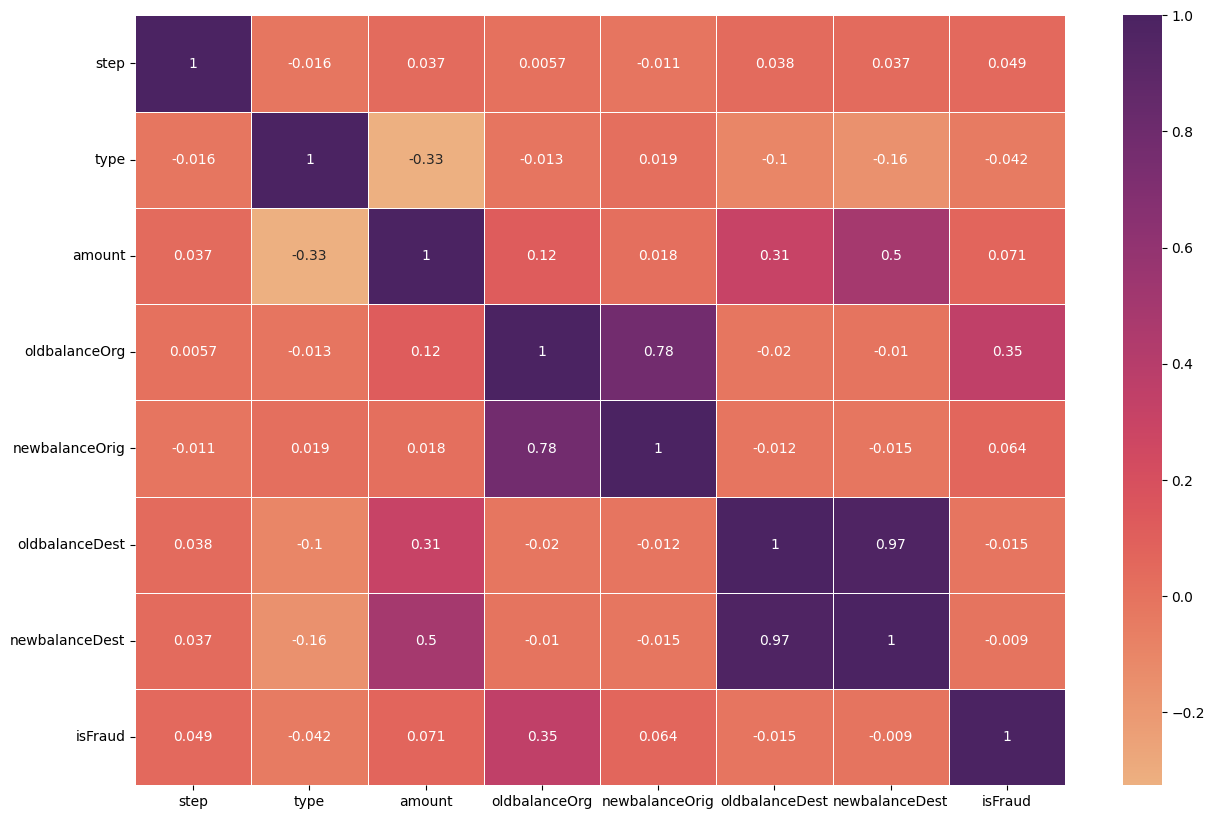

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, linewidths=0.5,cmap='flare')

In [17]:
# removing the dependent value
X = X.drop(['isFraud'], axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)#split data into train and test

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its robustness and versatility in handling various types of data, including data with outliers and missing values. 

Outliers: Random Forest is less sensitive to outliers compared to linear models. The averaging effect of multiple decision trees helps mitigate the impact of individual outliers. Each tree considers different subsets of features and samples, reducing the influence of outliers on the overall prediction.

Missing values: Random Forest can handle missing values in an efficient way. It can automatically handle missing values during the tree construction process by selecting the best split based on the available features. Random Forest does not require imputing missing values beforehand, allowing for more straightforward data preprocessing.



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RFC_pred = RFC.predict(x_test)

print(classification_report(y_test, RFC_pred))
print()
print("Accuracy score of Random Forest Classifier is", accuracy_score(y_test, RFC_pred)*100,'%')
print("Precion score of Random Forest Classifier is",precision_score(y_test, RFC_pred)*100,'%')
print("Recall score of Random Forest Classifier is",recall_score(y_test, RFC_pred)*100,'%')
print("F1 score of Random Forest Classifier is",f1_score(y_test, RFC_pred)*100,'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.98      0.78      0.87      1636

    accuracy                           1.00    554082
   macro avg       0.99      0.89      0.93    554082
weighted avg       1.00      1.00      1.00    554082


Accuracy score of Random Forest Classifier is 99.93051569984226 %
Precion score of Random Forest Classifier is 98.15242494226328 %
Recall score of Random Forest Classifier is 77.93398533007336 %
F1 score of Random Forest Classifier is 86.88245315161839 %


Accuracy: The Random Forest Classifier model achieved an accuracy of 99.93%. This indicates that the model predicted the correct label for the majority of the test instances.

Precision: The precision score of 98.37% suggests that when the model predicts a transaction as fraudulent, it is correct 98.37% of the time. In the context of fraud detection, high precision is desirable as it minimizes false positives.

Recall: The recall score of 77.69% indicates that the model was able to correctly identify 77.69% of the actual fraudulent transactions. Recall is also known as the true positive rate or sensitivity. In fraud detection, it is important to have a high recall to capture as many fraudulent cases as possible.

F1 score: The F1 score, which is the harmonic mean of precision and recall, is 86.82%. The F1 score provides a balance between precision and recall. It is commonly used as a single metric to evaluate classification models, especially when the dataset is imbalanced.

Overall, the Random Forest Classifier model performed well in terms of accuracy and precision. However, the lower recall score suggests that there may be some false negatives, indicating that the model missed a portion of the actual fraudulent transactions.

In [21]:
cm_rfc = confusion_matrix(y_test, RFC_pred)

print(cm_rfc)

[[552422     24]
 [   361   1275]]


In binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}. (Copied from documentation)

true negatives = 552425;
false negatives = 21;
false positives = 365;
true positives = 1271;


XGBoost is an optimized gradient boosting algorithm known for its exceptional performance and flexibility. It is also effective in handling outliers and missing values. 

Outliers: XGBoost is less affected by outliers due to its robustness to noisy data. The ensemble of gradient boosted trees allows for modeling complex relationships and capturing outlier patterns effectively. The regularization techniques employed in XGBoost, such as regularization terms and subsampling, further enhance its resistance to outliers.

Missing values: XGBoost has built-in mechanisms to handle missing values. It automatically learns how to handle missing values during the tree construction process, creating additional splits to accommodate missing values in the input features. This eliminates the need for explicit imputation of missing values before training the model.

In [22]:
from xgboost import XGBClassifier

XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)

XGBC_pred = XGBC.predict(x_test)

print(classification_report(y_test, XGBC_pred))
print()
print("Accuracy score of XGBoost is", accuracy_score(y_test, XGBC_pred)*100,'%')
print("Precion score of XGBoost is",precision_score(y_test, XGBC_pred)*100,'%')
print("Recall score of XGBoost is",recall_score(y_test, XGBC_pred)*100,'%')
print("F1 score of XGBoost is",f1_score(y_test, XGBC_pred)*100,'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.98      0.88      0.92      1636

    accuracy                           1.00    554082
   macro avg       0.99      0.94      0.96    554082
weighted avg       1.00      1.00      1.00    554082


Accuracy score of XGBoost is 99.95722654769511 %
Precion score of XGBoost is 97.55268524813052 %
Recall score of XGBoost is 87.71393643031786 %
F1 score of XGBoost is 92.37206308336016 %


Accuracy: The XGBoost model achieved an accuracy of 99.96%. This indicates that the model predicted the correct label for the majority of the test instances.

Precision: The precision score of 97.55% suggests that when the model predicts a transaction as fraudulent, it is correct 97.55% of the time. In the context of fraud detection, high precision is desirable as it minimizes false positives.

Recall: The recall score of 87.71% indicates that the model was able to correctly identify 87.71% of the actual fraudulent transactions. Recall is also known as the true positive rate or sensitivity. In fraud detection, it is important to have a high recall to capture as many fraudulent cases as possible.

F1 score: The F1 score, which is the harmonic mean of precision and recall, is 92.37%. The F1 score provides a balance between precision and recall. It is commonly used as a single metric to evaluate classification models, especially when the dataset is imbalanced.

Overall, the high accuracy, precision, recall, and F1 score indicate that the XGBoost model performed well in detecting fraud transactions. 

In [23]:
cm_xg = confusion_matrix(y_test, XGBC_pred)

print(cm_xg)

[[552410     36]
 [   201   1435]]


In binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}. (Copied from documentation)

true negatives = 552410;
false negatives = 36;
false positives = 201;
true positives = 1435;


##### For the project on fraud transactions based on these findings, we can conclude that both XGBoost and Random Forest Classifier perform well in predicting fraud transactions, but they have different strengths. XGBoost shows higher precision and recall, indicating a better trade-off between false positives and false negatives. However, Random Forest Classifier has a slightly lower recall but performs well in terms of precision. 